FISTA CBPDN Solver
==================

This example demonstrates use of a FISTA solver for a convolutional sparse coding problem with a colour dictionary and a colour signal [[34]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional) [[18]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2018-convolutional1)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \sum_c \left\| \sum_m \mathbf{d}_{c,m} * \mathbf{x}_m -\mathbf{s}_c \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_m \|_1 \;,$$

where $\mathbf{d}_{c,m}$ is channel $c$ of the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_m$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}_c$ is channel $c$ of the input image.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.fista import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True,
                                idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load colour dictionary and display it.

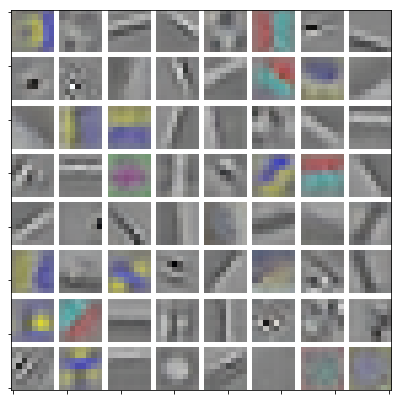

In [4]:
D = util.convdicts()['RGB:8x8x3x64']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [fista.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.fista.cbpdn.html#sporco.fista.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 1e-1
L = 1e2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 250,
            'RelStopTol': 8e-5, 'L': L, 'BackTrack': {'Enabled': True }})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------


   0  1.93e+02  1.28e+02  6.53e+02  1.23e+00  4.22e+06  4.44e+06     10  5.16e+02


   1  1.53e+02  8.58e+01  6.72e+02  1.06e-01  2.84e+06  3.18e+06      1  5.16e+02


   2  1.35e+02  6.19e+01  7.31e+02  3.86e-02  2.05e+06  2.18e+06      1  5.16e+02


   3  1.25e+02  4.96e+01  7.51e+02  1.59e-02  1.64e+06  1.71e+06      1  5.16e+02


   4  1.18e+02  4.14e+01  7.64e+02  8.82e-03  1.38e+06  1.42e+06      1  5.16e+02


   5  1.13e+02  3.66e+01  7.65e+02  5.56e-03  1.22e+06  1.25e+06      1  5.16e+02


   6  1.09e+02  3.32e+01  7.62e+02  3.81e-03  1.10e+06  1.13e+06      1  5.16e+02


   7  1.06e+02  3.09e+01  7.56e+02  2.83e-03  1.03e+06  1.05e+06      1  5.16e+02


   8  1.04e+02  2.92e+01  7.48e+02  2.24e-03  9.72e+05  9.91e+05      1  5.16e+02


   9  1.02e+02  2.80e+01  7.40e+02  1.86e-03  9.31e+05  9.47e+05      1  5.16e+02


  10  1.00e+02  2.70e+01  7.32e+02  1.59e-03  8.99e+05  9.12e+05      1  5.16e+02


  11  9.87e+01  2.62e+01  7.24e+02  1.39e-03  8.73e+05  8.85e+05      1  5.16e+02


  12  9.73e+01  2.56e+01  7.17e+02  1.22e-03  8.53e+05  8.63e+05      1  5.16e+02


  13  9.60e+01  2.51e+01  7.10e+02  1.09e-03  8.35e+05  8.45e+05      1  5.16e+02


  14  9.49e+01  2.46e+01  7.03e+02  9.74e-04  8.21e+05  8.29e+05      1  5.16e+02


  15  9.39e+01  2.43e+01  6.97e+02  8.91e-04  8.08e+05  8.16e+05      1  5.16e+02


  16  9.30e+01  2.39e+01  6.91e+02  7.94e-04  7.97e+05  8.04e+05      1  5.16e+02


  17  9.22e+01  2.36e+01  6.85e+02  7.20e-04  7.88e+05  7.94e+05      1  5.16e+02


  18  9.14e+01  2.34e+01  6.80e+02  6.61e-04  7.79e+05  7.85e+05      1  5.16e+02


  19  9.07e+01  2.32e+01  6.75e+02  6.12e-04  7.72e+05  7.77e+05      1  5.16e+02


  20  9.00e+01  2.30e+01  6.71e+02  5.58e-04  7.65e+05  7.70e+05      1  5.16e+02


  21  8.94e+01  2.28e+01  6.67e+02  5.17e-04  7.59e+05  7.63e+05      1  5.16e+02


  22  8.89e+01  2.26e+01  6.63e+02  4.85e-04  7.53e+05  7.57e+05      1  5.16e+02


  23  8.84e+01  2.24e+01  6.59e+02  4.45e-04  7.48e+05  7.52e+05      1  5.16e+02


  24  8.79e+01  2.23e+01  6.56e+02  4.14e-04  7.43e+05  7.47e+05      1  5.16e+02


  25  8.74e+01  2.22e+01  6.52e+02  3.87e-04  7.39e+05  7.42e+05      1  5.16e+02


  26  8.70e+01  2.21e+01  6.49e+02  3.61e-04  7.35e+05  7.38e+05      1  5.16e+02


  27  8.66e+01  2.19e+01  6.46e+02  3.34e-04  7.31e+05  7.34e+05      1  5.16e+02


  28  8.62e+01  2.18e+01  6.44e+02  3.17e-04  7.28e+05  7.30e+05      1  5.16e+02


  29  8.58e+01  2.17e+01  6.41e+02  3.01e-04  7.24e+05  7.27e+05      1  5.16e+02


  30  8.55e+01  2.16e+01  6.39e+02  2.87e-04  7.21e+05  7.24e+05      1  5.16e+02


  31  8.52e+01  2.16e+01  6.36e+02  2.66e-04  7.18e+05  7.21e+05      1  5.16e+02


  32  8.49e+01  2.15e+01  6.34e+02  2.44e-04  7.16e+05  7.18e+05      1  5.16e+02


  33  8.46e+01  2.14e+01  6.32e+02  2.40e-04  7.13e+05  7.15e+05      1  5.16e+02


  34  8.43e+01  2.13e+01  6.30e+02  2.26e-04  7.11e+05  7.13e+05      1  5.16e+02


  35  8.41e+01  2.13e+01  6.28e+02  2.16e-04  7.09e+05  7.11e+05      1  5.16e+02


  36  8.38e+01  2.12e+01  6.26e+02  2.04e-04  7.07e+05  7.08e+05      1  5.16e+02


  37  8.36e+01  2.11e+01  6.25e+02  1.93e-04  7.05e+05  7.06e+05      1  5.16e+02


  38  8.34e+01  2.11e+01  6.23e+02  1.84e-04  7.03e+05  7.04e+05      1  5.16e+02


  39  8.32e+01  2.10e+01  6.21e+02  1.75e-04  7.01e+05  7.03e+05      1  5.16e+02


  40  8.30e+01  2.10e+01  6.20e+02  1.64e-04  7.00e+05  7.01e+05      1  5.16e+02


  41  8.28e+01  2.10e+01  6.18e+02  1.55e-04  6.98e+05  7.00e+05      1  5.16e+02


  42  8.26e+01  2.09e+01  6.17e+02  1.53e-04  6.97e+05  6.98e+05      1  5.16e+02


  43  8.24e+01  2.09e+01  6.15e+02  1.47e-04  6.96e+05  6.97e+05      1  5.16e+02


  44  8.22e+01  2.08e+01  6.14e+02  1.39e-04  6.94e+05  6.96e+05      1  5.16e+02


  45  8.21e+01  2.08e+01  6.13e+02  1.31e-04  6.93e+05  6.94e+05      1  5.16e+02


  46  8.19e+01  2.08e+01  6.12e+02  1.26e-04  6.92e+05  6.93e+05      1  5.16e+02


  47  8.18e+01  2.07e+01  6.10e+02  1.22e-04  6.91e+05  6.92e+05      1  5.16e+02


  48  8.16e+01  2.07e+01  6.09e+02  1.16e-04  6.90e+05  6.91e+05      1  5.16e+02


  49  8.15e+01  2.07e+01  6.08e+02  1.17e-04  6.89e+05  6.90e+05      1  5.16e+02


  50  8.14e+01  2.06e+01  6.07e+02  1.09e-04  6.88e+05  6.89e+05      1  5.16e+02


  51  8.12e+01  2.06e+01  6.06e+02  1.00e-04  6.87e+05  6.88e+05      1  5.16e+02


  52  8.11e+01  2.06e+01  6.05e+02  1.01e-04  6.86e+05  6.87e+05      1  5.16e+02


  53  8.10e+01  2.06e+01  6.04e+02  9.45e-05  6.86e+05  6.86e+05      1  5.16e+02


  54  8.09e+01  2.06e+01  6.03e+02  9.01e-05  6.85e+05  6.86e+05      1  5.16e+02


  55  8.08e+01  2.05e+01  6.02e+02  8.44e-05  6.84e+05  6.85e+05      1  5.16e+02


  56  8.07e+01  2.05e+01  6.02e+02  8.23e-05  6.84e+05  6.84e+05      1  5.16e+02


  57  8.06e+01  2.05e+01  6.01e+02  7.92e-05  6.83e+05  6.84e+05      1  5.16e+02
---------------------------------------------------------------------------------
ConvBPDN solve time: 17.54s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 36.81dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

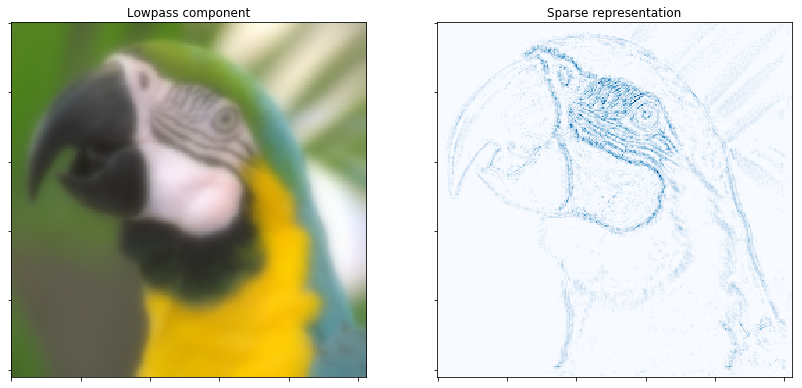

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

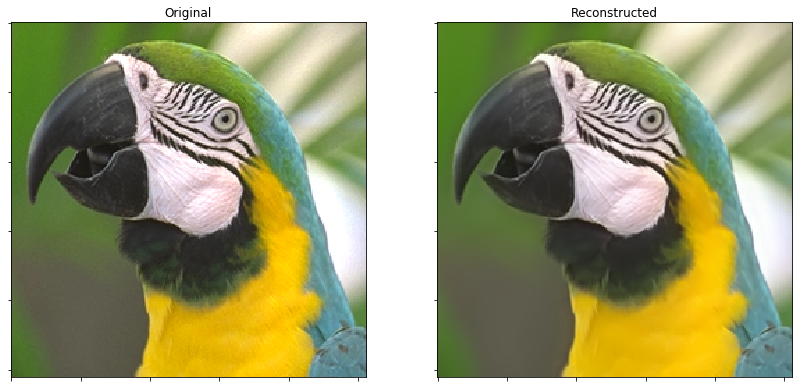

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

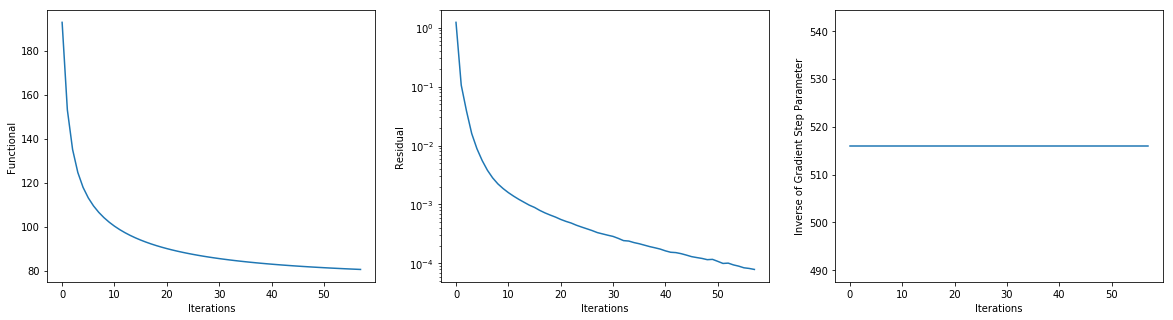

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(its.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.L, xlbl='Iterations',
          ylbl='Inverse of Gradient Step Parameter', fig=fig)
fig.show()